In [1]:
import random

# encoding
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

# compute cost
def compute_cost(individual): # cost
    return sum(val*val for val in individual)

In [2]:
def create_individual():
    return [generate_random_value() for _ in range(n)]

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1) 
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 < index1: # get smaller one (cost)
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [5]:
n = 6
m = 100
n_generations = 300

losses = []

##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_cost)
        
    # for debug
    losses.append(compute_cost(sorted_population[0]))
    print("Cost:", compute_cost(sorted_population[0]))
    
    # create new_population (get the first two)
    new_population = sorted_population[:elitism]   
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy 
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Cost: 4627.538064695505
Cost: 4627.538064695505
Cost: 4103.5637929894265
Cost: 3166.4052629474136
Cost: 2983.158952805413
Cost: 2350.6135290725347
Cost: 2350.6135290725347
Cost: 1042.1898616334981
Cost: 1042.1898616334981
Cost: 1042.1898616334981
Cost: 886.5876709618778
Cost: 886.5876709618778
Cost: 525.0004462497725
Cost: 182.21596426658317
Cost: 182.21596426658317
Cost: 182.21596426658317
Cost: 182.21596426658317
Cost: 155.2389979858622
Cost: 132.8078371129142
Cost: 114.41791539409728
Cost: 114.41791539409728
Cost: 114.41791539409728
Cost: 114.41791539409728
Cost: 114.41791539409728
Cost: 107.73568762923838
Cost: 107.73568762923838
Cost: 107.73568762923838
Cost: 107.73568762923838
Cost: 79.69930898493595
Cost: 73.6433693441582
Cost: 73.6433693441582
Cost: 73.6433693441582
Cost: 73.6433693441582
Cost: 73.6433693441582
Cost: 69.98985740439575
Cost: 69.98985740439575
Cost: 56.49333106572852
Cost: 56.49333106572852
Cost: 45.68698849201033
Cost: 45.68698849201033
Cost: 38.79294296374004
C

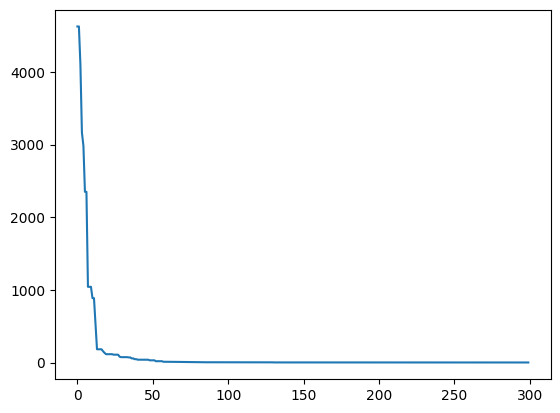

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

## using fitness

In [7]:
import random

# encoding
def generate_random_value(bound = 100):
    return (random.random()*2 - 1)*bound

def create_individual():
    return [generate_random_value() for _ in range(n)]

# compute fitness
def compute_fitness(individual):
    return 1 / (0.0001 + sum(val*val for val in individual))

In [8]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

def selection(sorted_old_population):    
    index1 = random.randint(0, m-1) 
    index2 = random.randint(0, m-1)
    
    while index2 == index1:
        index2 = random.randint(0, m-1)
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 

In [9]:
n = 6
m = 100
n_generations = 300

fitnesses = []

##### algorithm
# step 1: create initial population
population = [create_individual() for _ in range(m)]

#==== loops
elitism = 2
for i in range(n_generations):
    sorted_population = sorted(population, key=compute_fitness)
        
    # for debug
    fitnesses.append(compute_fitness(sorted_population[-1]))
    print("Fitness:", compute_fitness(sorted_population[-1]))
    
    # create new_population
    new_population = sorted_population[-elitism:]   
    
    while len(new_population) < m:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        # copy 
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # update population
    population = new_population

Fitness: 0.0001298333611888605
Fitness: 0.00017818025424083659
Fitness: 0.000229053322422221
Fitness: 0.0004218482214077055
Fitness: 0.0004394238496326368
Fitness: 0.0005956435929752423
Fitness: 0.0007985913046117565
Fitness: 0.0007985913046117565
Fitness: 0.0012211746253159887
Fitness: 0.0012211746253159887
Fitness: 0.002063198817746474
Fitness: 0.002063198817746474
Fitness: 0.002063198817746474
Fitness: 0.002063198817746474
Fitness: 0.002498452635265092
Fitness: 0.0032535365698245946
Fitness: 0.0032535365698245946
Fitness: 0.0032535365698245946
Fitness: 0.003316548208893326
Fitness: 0.004576546956617952
Fitness: 0.004605168919257948
Fitness: 0.004774772262547711
Fitness: 0.00485117013651905
Fitness: 0.010479783933214812
Fitness: 0.010479783933214812
Fitness: 0.010479783933214812
Fitness: 0.010479783933214812
Fitness: 0.010479783933214812
Fitness: 0.010517622796511424
Fitness: 0.010517622796511424
Fitness: 0.01198301864479339
Fitness: 0.01198301864479339
Fitness: 0.015077271177928595


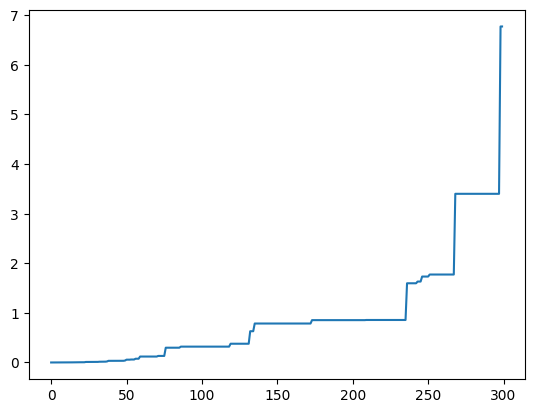

In [10]:
import matplotlib.pyplot as plt

plt.plot(fitnesses)
plt.show()

In [11]:
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])

[0.17700203130679437, -0.24599139936716252, -0.1183035695637269, 0.022289842464906506, -0.009857872235730092, -0.20291114421253642]
